## Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

## Importing DataSets

In [2]:
data = pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()  #Null Check

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Numerical data analysis

<Axes: >

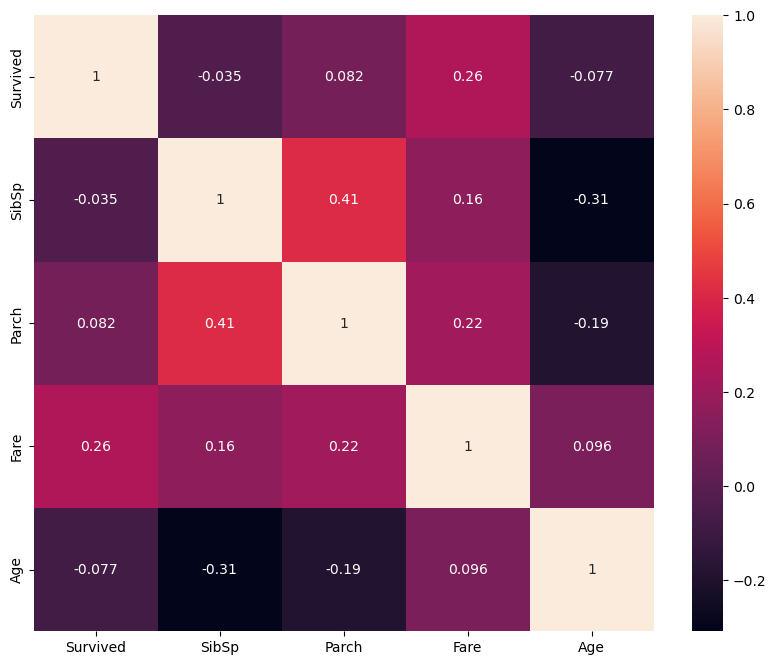

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data[['Survived','SibSp','Parch','Fare','Age']].corr(),annot = True)

## Sibling Survival

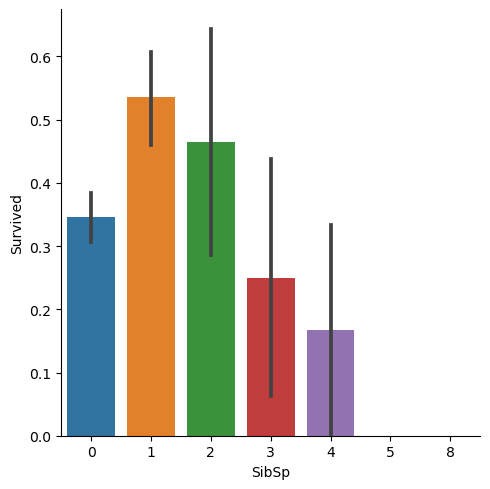

In [6]:
sns.catplot(x ='SibSp',y = 'Survived', data= data, kind = 'bar')

## Age

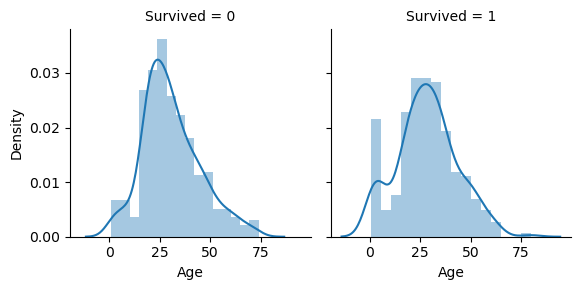

In [7]:
age_visual = sns.FacetGrid(data,col ='Survived')
age_visual = age_visual.map(sns.distplot,'Age')

## Gender

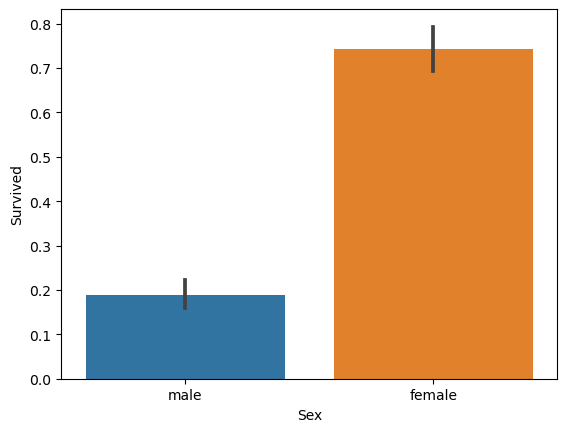

In [8]:
gender_visual = sns.barplot(x='Sex',y ='Survived',data=data)

In [9]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## Pclass

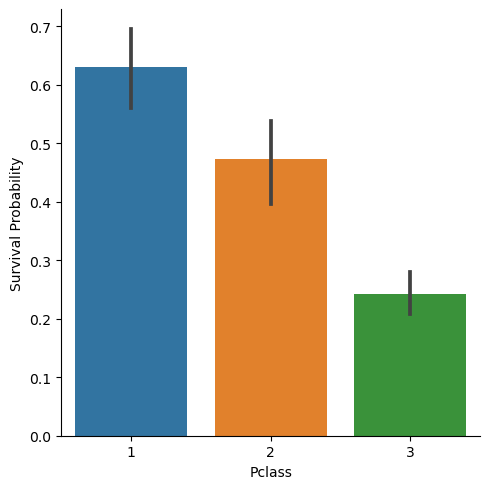

In [10]:
pclass_visual = sns.catplot(x='Pclass',y='Survived',data = data,kind = "bar").set_ylabels('Survival Probability')

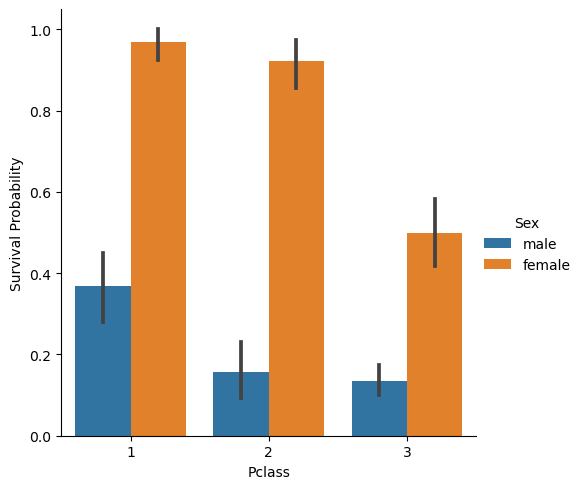

In [11]:
pclass_visual = sns.catplot(x='Pclass',y='Survived',data = data,kind = "bar",hue="Sex").set_ylabels('Survival Probability')

## <font color = "Green">Embarked<font/>

In [12]:
data['Embarked'].isnull().sum()

2

In [13]:
data['Embarked'] = data['Embarked'].fillna('S')

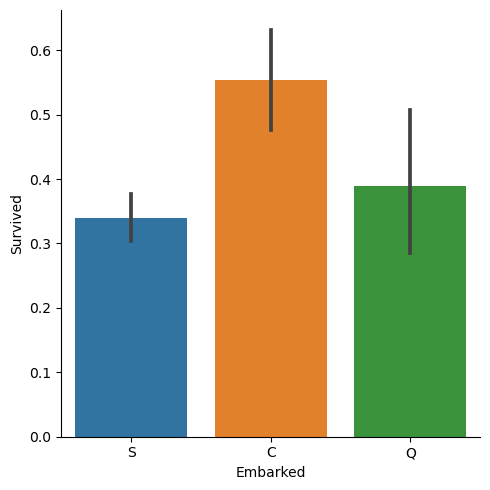

In [14]:
sns.catplot(x='Embarked',y = 'Survived',data = data,kind ='bar')

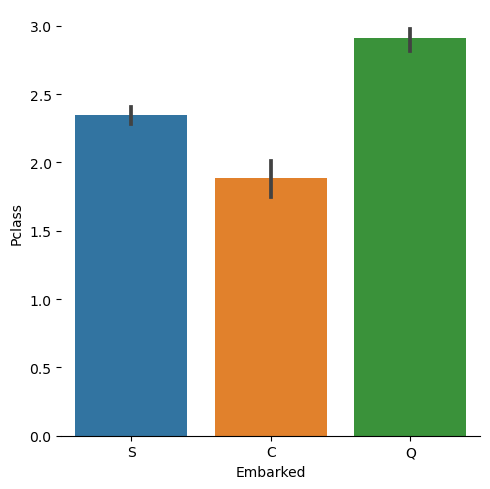

In [15]:
g = sns.catplot(y = "Pclass",x="Embarked",data = data,kind ="bar")
g.despine(left = True)

## Preparing the Data

In [46]:
data = pd.read_csv("titanic_data.csv")

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()  # Filling null values

In [49]:
rand_age = np.random.randint(mean-std,mean+std,size =is_null)

In [50]:
a =data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
data['Embarked'] = data["Embarked"].fillna("S") # fill null values in embarked

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
col_to_drop = ["PassengerId","Cabin","Ticket","Name"]
data.drop(col_to_drop, axis = 1, inplace = True)     #dropping columns which aren't necessary

In [55]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [56]:
genders = {"male":0, "female":1}
data["Sex"] = data["Sex"].map(genders) #converting categorical data to numerical for genders

In [57]:
ports = {"S":0,"C":1,"Q":2}
data["Embarked"] = data["Embarked"].map(ports) #converting categorical data to numerical for embarked

In [58]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Splitting

In [59]:
x = data.drop(data.columns[[0]], axis = 1)
y = data["Survived"]

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

## Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train =sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

## Classification

In [65]:
logreg = LogisticRegression()
svc_classifier = SVC()
knn_classifier = KNeighborsClassifier(5)
dt_classifier = DecisionTreeClassifier()
rt_classifier = RandomForestClassifier(n_estimators = 1000)

In [66]:
logreg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
rt_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [70]:
logreg_ypred = logreg.predict(x_test)
svc_classifier_ypred = svc_classifier.predict(x_test)
knn_classifier_ypred = knn_classifier.predict(x_test)
dt_classifier_ypred = dt_classifier.predict(x_test)
rt_classifier_ypred = rt_classifier.predict(x_test)

## Testing Accuracy of the Models

In [71]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(y_test,logreg_ypred)
svc_classifier_acc = accuracy_score(y_test,svc_classifier_ypred)
knn_classifier_acc = accuracy_score(y_test,knn_classifier_ypred)
dt_classifier_acc = accuracy_score(y_test,dt_classifier_ypred)
rt_classifier_acc = accuracy_score(y_test,rt_classifier_ypred)

In [72]:
print("Logistic Regression           : ", round(logreg_acc*100,2))
print("Support Vector Classification : ", round(svc_classifier_acc*100,2))
print("K Nearest Neighbours          : ", round(knn_classifier_acc*100,2))
print("Decision Tree Classifier      : ", round(dt_classifier_acc*100,2))
print("Random Forest Classifier      : ", round(rt_classifier_acc*100,2))

Logistic Regression           :  80.6
Support Vector Classification :  80.97
K Nearest Neighbours          :  82.46
Decision Tree Classifier      :  81.72
Random Forest Classifier      :  82.46
